<a href="https://colab.research.google.com/github/ujjwalgithub123/COVID-19-CLASSIFIER.ipynb/blob/main/COVID_19_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

! git clone https://github.com/education454/datasets.git

In [ ]:
import os
base_dir = '/content/datasets/Data'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')

In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID-19 (11).jpg', 'COVID-19 (7).jpg', 'COVID19(296).jpg', 'COVID19(131).jpg', 'COVID19(412).jpg', 'COVID19(421).jpg', 'COVID19(544).jpg', 'COVID-19 (1).jpeg', 'COVID19(187).jpg', 'COVID19(348).jpg']
['NORMAL(1527).jpg', 'NORMAL(1393).jpg', 'NORMAL(983).jpg', 'NORMAL(1568).jpg', 'NORMAL(1073).jpg', 'NORMAL(1550).jpg', 'NORMAL(834).jpg', 'NORMAL(1314).jpg', 'NORMAL(1260).jpg', 'NORMAL(391).jpg']
['COVID19(332).jpg', 'COVID19(483).jpg', 'COVID19(449).jpg', 'COVID19(210).jpg', 'COVID19(425).jpg', 'COVID-19 (547).jpg', 'COVID19(505).jpg', 'COVID-19 (831).jpg', 'COVID19(269).jpg', 'COVID19(391).jpg']
['NORMAL(1566).jpg', 'NORMAL(275).jpg', 'NORMAL(561).jpg', 'NORMAL(1088).jpg', 'NORMAL(646).jpg', 'NORMAL(156).jpg', 'NORMAL(332).jpg', 'NORMAL(428).jpg', 'NORMAL(947).jpg', 'NORMAL(466).jpg']


In [ ]:
print('train_dataset_covid_images :',len(train_covid_names))
print('train_dataset_normal_images :',len(train_normal_names))
print('test_dataset_covid_images :',len(test_covid_names))
print('test_dataset_normal_images :',len(test_normal_names))
print('Total train images :', len(train_covid_names+train_normal_names))
print('Total test images :', len(test_covid_names+test_normal_names))

train_dataset_covid_images : 545
train_dataset_normal_images : 1266
test_dataset_covid_images : 167
test_dataset_normal_images : 317
Total train images : 1811
Total test images : 484


['/content/datasets/Data/train/COVID19/COVID-19 (11).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (7).jpg', '/content/datasets/Data/train/COVID19/COVID19(296).jpg', '/content/datasets/Data/train/COVID19/COVID19(131).jpg', '/content/datasets/Data/train/COVID19/COVID19(412).jpg', '/content/datasets/Data/train/COVID19/COVID19(421).jpg', '/content/datasets/Data/train/COVID19/COVID19(544).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (1).jpeg']
['/content/datasets/Data/train/NORMAL/NORMAL(1527).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1393).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(983).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1568).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1073).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1550).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(834).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1314).jpg']


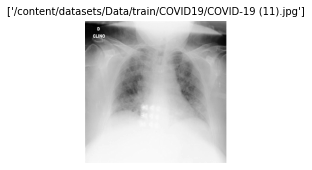

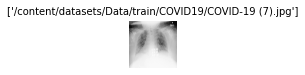

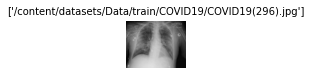

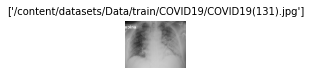

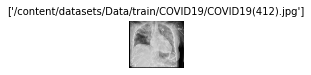

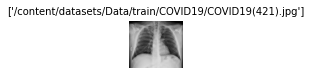

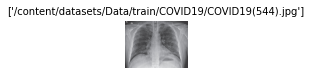

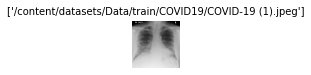

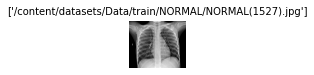

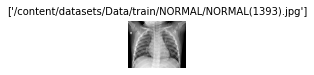

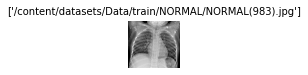

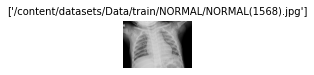

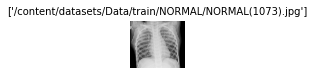

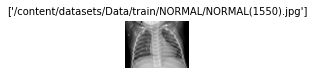

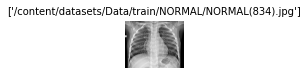

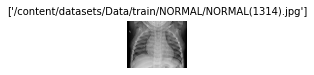

In [ ]:
import matplotlib.image as mpimg
#plot a grid of 16 images (8 images of COVID 19 , 8 images of NORMAL)
 
#set the no.of rows and columns
nrows=4
ncols=4
#set the figure size
fig=plt.gcf() # plt.gcf gives us the reference to the current figure
fig.set_size_inches(12,12)
#get the filenames from the covid and the normal directories of the train datset
next_covid_pic = [os.path.join(train_covid_dir,fname) for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname) for fname in train_normal_names[0:8]]
print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_normal_pic):
  data= img_path.split('\\',6)
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img=mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')
  plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   validation_split=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   )
validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator= train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   subset='training',
                                                   batch_size=32,
                                                   class_mode='binary')
validation_generator= train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   subset='validation',
                                                   batch_size=32,
                                                   class_mode='binary')
test_generator= test_datagen.flow_from_directory(test_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model=Sequential()
# add convolutional layer
#filters, size of filters, padding , activation_function, input_shape
model.add(Conv2D(32,(5,5), padding='SAME', activation='relu', input_shape=(150,150,3)))
#pooling_layer
model.add(MaxPooling2D(pool_size=(2,2)))
#place a dropout layer
model.add(Dropout(0.5))
#add another convolutional layer
model.add(Conv2D(64,(5,5), padding='SAME', activation='relu'))
#pooling_layer
model.add(MaxPooling2D(pool_size=(2,2)))
#flatten the image to one dimensional array
model.add(Flatten())
# add a dense layer: amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
model.add(Dropout(0.5))   #0.5 dropout rate is recommended, half input nodes will be dropped at each update

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               2

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator,
                    validation_steps = 10)

Epoch 1/30
46/46 [==============================] - 149s 3s/step - loss: 1.3205 - accuracy: 0.7322 - val_loss: 0.5793 - val_accuracy: 0.7625
Epoch 2/30
46/46 [==============================] - 146s 3s/step - loss: 0.2815 - accuracy: 0.8854 - val_loss: 0.3492 - val_accuracy: 0.9594
Epoch 3/30
46/46 [==============================] - 146s 3s/step - loss: 0.2188 - accuracy: 0.9186 - val_loss: 0.2076 - val_accuracy: 0.9219
Epoch 4/30
46/46 [==============================] - 146s 3s/step - loss: 0.1681 - accuracy: 0.9413 - val_loss: 0.1374 - val_accuracy: 0.9656
Epoch 5/30
46/46 [==============================] - 145s 3s/step - loss: 0.1390 - accuracy: 0.9538 - val_loss: 0.2927 - val_accuracy: 0.9187
Epoch 6/30
46/46 [==============================] - 145s 3s/step - loss: 0.1589 - accuracy: 0.9517 - val_loss: 0.1964 - val_accuracy: 0.9656
Epoch 7/30
46/46 [==============================] - 145s 3s/step - loss: 0.1348 - accuracy: 0.9565 - val_loss: 0.1488 - val_accuracy: 0.9531
Epoch 8/30
46

In [ ]:

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

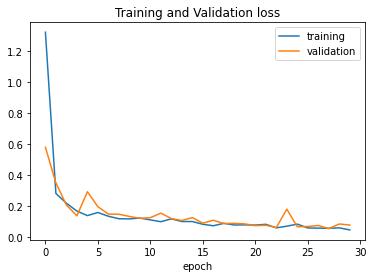

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

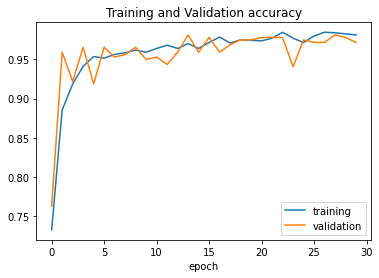

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test_acc :{} test loss :{}'.format(test_acc,test_loss))

16/16 [==============================] - 19s 1s/step - loss: 0.0756 - accuracy: 0.9690
test_acc :0.9690082669258118 test loss :0.07562251389026642


In [ ]:
   import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
       print('Covid19')
  else:
       print('Normal')

Saving Chest.jpeg to Chest (3).jpeg
/content/Chest.jpeg
Chest.jpeg
Normal
